In [27]:
import numpy as np
import matplotlib.pyplot as plt

In [28]:
# Before you run this notebook, kindly upload the files (test.png and test.txt) to the content folder 
# by the left hand side of the notebook.

# Or replace this path with the path to the location the required files (test.png and test.txt) were placed in.

path = "/content/"



---



PROBLEM 1





---



In [29]:
from collections import OrderedDict

In [30]:
text_list = []
with open(path + 'test.txt') as f:
    text_list = [line.replace("\n", "") for line in f.readlines()]

text_dict = {}
for line in text_list:
  for char in line:
    if char.isspace() or char.isalpha() == False:
      continue

    char = char.lower()
    if char in text_dict:
      text_dict[char] += 1

    else:
      text_dict[char] = 1

print(text_dict)

{'t': 36, 'h': 25, 'e': 63, 'q': 22, 'u': 38, 'i': 56, 'c': 23, 'k': 22, 'b': 24, 'r': 40, 'o': 50, 'w': 22, 'n': 28, 'f': 22, 'x': 22, 'j': 23, 'm': 22, 'p': 25, 's': 25, 'v': 22, 'a': 44, 'l': 26, 'z': 23, 'y': 27, 'd': 30, 'g': 23}


In [31]:
def plot_bar(title, dict, color):
  print(f"The histogram is: {dict}")
  plt.figure(figsize=(16, 10))

  plt.bar(dict.keys(), dict.values(), color = color)
  plt.xlabel('Letters')
  plt.ylabel('Frequencies')

  plt.title(title)
  plt.legend()
  plt.grid(axis='y')
  plt.show()

The histogram is: {'a': 44, 'b': 24, 'c': 23, 'd': 30, 'e': 63, 'f': 22, 'g': 23, 'h': 25, 'i': 56, 'j': 23, 'k': 22, 'l': 26, 'm': 22, 'n': 28, 'o': 50, 'p': 25, 'q': 22, 'r': 40, 's': 25, 't': 36, 'u': 38, 'v': 22, 'w': 22, 'x': 22, 'y': 27, 'z': 23}


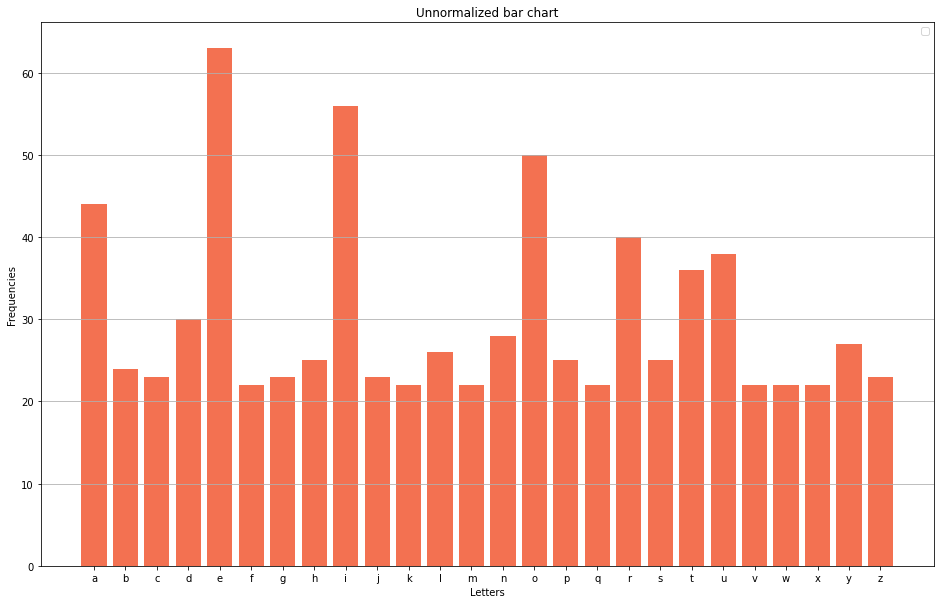

In [32]:
dict = sorted(text_dict.items())
text_dict = {dict[i][0]: dict[i][1] for i in range(len(dict))}

plot_bar("Unnormalized bar chart", text_dict, '#f37151')

The histogram is: {'a': 0.0561941251596424, 'b': 0.03065134099616858, 'c': 0.02937420178799489, 'd': 0.038314176245210725, 'e': 0.08045977011494253, 'f': 0.0280970625798212, 'g': 0.02937420178799489, 'h': 0.031928480204342274, 'i': 0.07151979565772669, 'j': 0.02937420178799489, 'k': 0.0280970625798212, 'l': 0.033205619412515965, 'm': 0.0280970625798212, 'n': 0.035759897828863345, 'o': 0.06385696040868455, 'p': 0.031928480204342274, 'q': 0.0280970625798212, 'r': 0.05108556832694764, 's': 0.031928480204342274, 't': 0.04597701149425287, 'u': 0.04853128991060025, 'v': 0.0280970625798212, 'w': 0.0280970625798212, 'x': 0.0280970625798212, 'y': 0.034482758620689655, 'z': 0.02937420178799489}


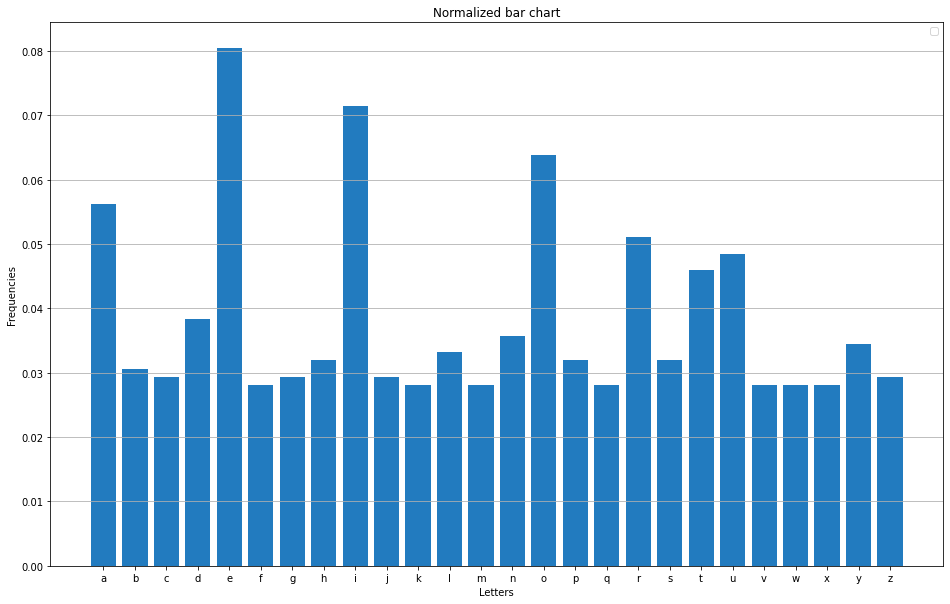

In [33]:
total = np.sum(list(text_dict.values()))
dict = sorted(text_dict.items())
text_dict = {dict[i][0]: dict[i][1]/total for i in range(len(dict))}

plot_bar("Normalized bar chart", text_dict, '#227bbf')



---



PROBLEM 2




---



In [34]:
import cv2

The shape of the image is:  (128, 128, 3)
The first pixel os the image is:  [103 180 219]


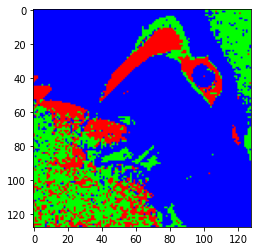

In [35]:
# Read the image as a numpy array
img = cv2.imread(path + 'test.png')
print("The shape of the image is: ", img.shape)
print("The first pixel os the image is: ", img[0][0])

point1 = [255, 0, 0]
point2 = [0, 255, 0]
point3 = [0, 0, 255]

width, height, channel = img.shape
for i in range(width):
  for j in range(height):
    pixel = img[i][j]
    dist1 = np.linalg.norm(point1 - pixel)
    dist2 = np.linalg.norm(point2 - pixel)
    dist3 = np.linalg.norm(point3 - pixel)

    # Find the point with the least euclidean distance and set the given pixel in the image to that point
    min_dist = min([dist1, dist2, dist3])

    if min_dist == dist1:
      img[i][j] = point1
    elif min_dist == dist2:
      img[i][j] = point2
    elif min_dist == dist3:
      img[i][j] = point3
  
# Save the image to a file named output1.png
cv2.imwrite(path + 'output1.png', img)

plt.imshow(img)
plt.show()

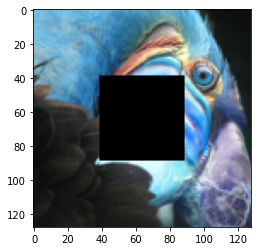

In [36]:
# Read the image as a numpy array
img = cv2.imread(path + 'test.png')

centroid_x = img.shape[0]/2
centroid_y = img.shape[1]/2

x1 = int(centroid_x - 50/2)
y1 = int(centroid_y - 50/2)
temp_y1 = y1

x2 = int(centroid_x + 50/2)
y2 = int(centroid_y + 50/2)

while x1 < x2:
  while y1 < y2:
    img[x1][y1] = [0, 0, 0]
    y1 += 1

  x1 += 1
  y1 = temp_y1

# Save the image to a file named output2.png
cv2.imwrite(path + 'output2.png', img)

plt.imshow(img)
plt.show()



---



PROBLEM 3





---



Here we can reduce the word problem to  mathematical equation where tacos would be represented as **x** and buritos as **y**. 


```
3x + 3y = 11.25
4x + 2y = 10.00
```

And we have that this is solvable by transforming it to the form below:


```
x = A^-1 * b
```


In [37]:
A = np.array([[3, 3], [4, 2]])
b = np.array([[11.25], [10.00]])

x = np.linalg.solve(A, b)

print(x)

[[1.25]
 [2.5 ]]
